# 1) Installing and Importing Packages

## 1.1) Installing the Packages


In [1]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.5 MB/s eta 0:00:00:00:0100:01


In [2]:
!pip install ultralytics seaborn plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 24.4 MB/s eta 0:00:0000:01


In [3]:
!pip install --upgrade nbformat

## 1.2) Importing Required Libraries

In [4]:
# Standard libraries
import os
import json
import logging
import numpy as np
import pandas as pd

# PyTorch and YOLO
import torch
from ultralytics import YOLO

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Image processing
from PIL import Image, ImageDraw

# Scikit-learn for evaluation metrics
from sklearn.metrics import confusion_matrix

# Set default renderer for Plotly
pio.renderers.default = "notebook"


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 2) Loading the Trained Model

## 2.1) Specifying the Model Path

In [5]:
# Define the path to the best trained model
#model_path = "./runs/detect/final_corvidae_detection/weights/best.pt"
model_path = "/kaggle/input/lyon2-result-train-cv/kaggle/working/runs/detect/final_corvidae_detection/weights/best.pt"

## 2.2) Loading the Model

In [6]:
# Load the trained YOLO model
model = YOLO(model_path)

# Print confirmation message
print("Model loaded successfully.")

Model loaded successfully.


# 3) Evaluating Model Performance


## 3.1) Running Evaluation on Test Data


In [7]:
# Validate the trained model on the test dataset
metrics = model.val(data="/kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/data.yaml", split="test")


Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]
val: Scanning /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/labels... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 218.38it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]


                   all         19         38      0.961      0.889      0.911      0.705
                  crow          4          4      0.953          1      0.995      0.845
                pigeon          4         11          1      0.797      0.875      0.591
               seagull         11         23      0.929       0.87      0.864       0.68


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



Speed: 5.3ms preprocess, 6.9ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to runs/detect/val


## 3.2) Displaying Key Metrics

In [8]:
# Display main evaluation metrics
metrics_summary = {
    "mAP50": metrics.box.map50,      # Mean Average Precision at 50% IoU
    "Precision": metrics.box.map,    # Overall model precision
    "Recall": metrics.box.mr         # Model recall
}

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame([metrics_summary])

# Print the evaluation metrics
print(metrics_df)

      mAP50  Precision    Recall
0  0.911338   0.705291  0.888991


# 4) Visualizing Performance Metrics

## 4.1) Plotting Precision-Recall and F1 Curves


In [9]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

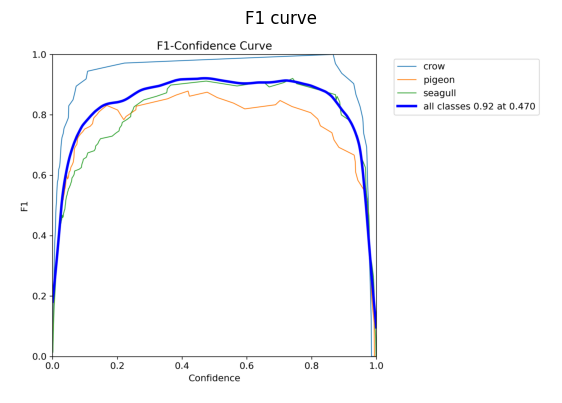

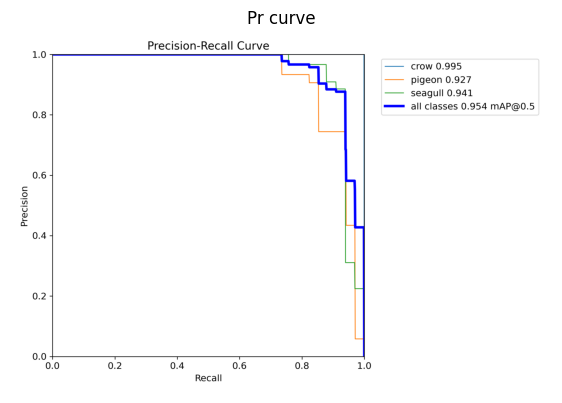

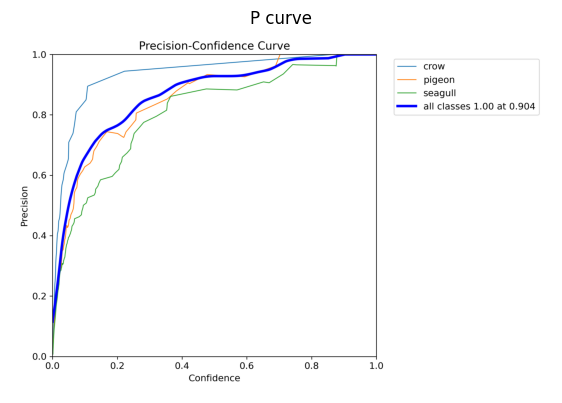

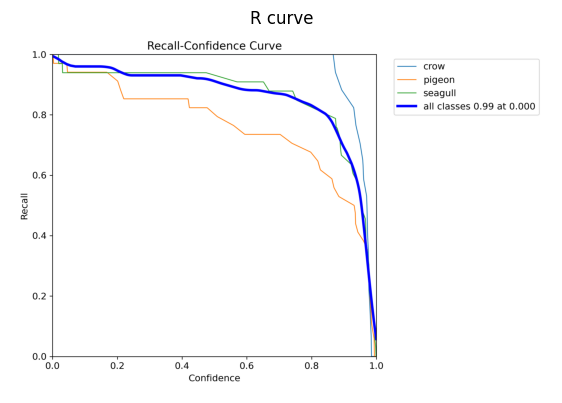

In [10]:
base_path = "/kaggle/input/lyon2-result-train-cv/kaggle/working/runs/detect/final_corvidae_detection"

# List of performance metric images to display
performance_images = ['F1_curve', 'PR_curve', 'P_curve', 'R_curve']

# Loop through each image name and display if it exists
for img_name in performance_images:
    img_path = os.path.join(base_path, f"{img_name}.png")

    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.figure(figsize=(7, 5))
        plt.imshow(img)
        plt.title(img_name.replace("_", " ").capitalize())  # Format title
        plt.axis('off')  # Remove axes for better visualization
        plt.show(block=True)
    else:
        print(f"Image missing: {img_path}")


## 4.2) Displaying the Confusion Matrix as Heatmap

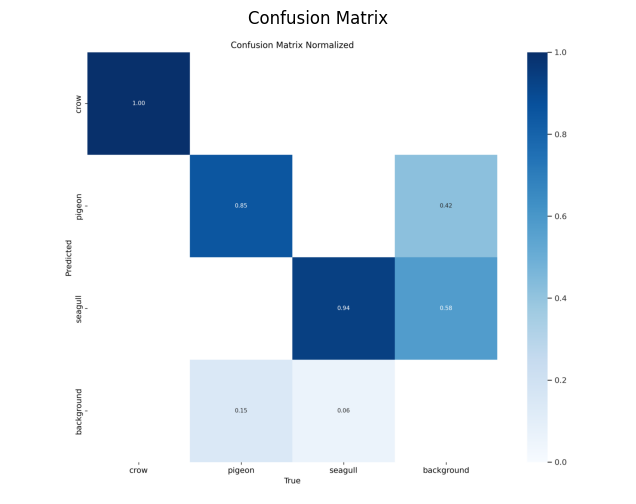

In [11]:
%matplotlib inline

conf_matrix_path = "/kaggle/input/lyon2-result-train-cv/kaggle/working/runs/detect/final_corvidae_detection/confusion_matrix_normalized.png"

# Check if the confusion matrix image exists and display it
if os.path.exists(conf_matrix_path):
    img = Image.open(conf_matrix_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axis for better visualization
    plt.title("Confusion Matrix")  # Set title
    plt.show()
else:
    print("Confusion matrix not found. Check the results folder.")


# 5) Advanced Error Analysis

## 5.1) Distribution of False Positives and False Negatives


In [12]:
!pip install scikit-learn


image 1/19 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/100_000044_aug_1_jpg.rf.e17c829ec99047ce651ab57f9e762f4c.jpg: 640x640 1 crow, 10.2ms
image 2/19 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/123_000001_aug_0_jpg.rf.5efe6e748ea09feecb391799a685dba1.jpg: 640x640 1 seagull, 8.5ms
image 3/19 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/12_000005_aug_1_jpg.rf.d0734d224f071538a92ac86d1df8efac.jpg: 640x640 1 pigeon, 7.9ms
image 4/19 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/134_000030_aug_0_jpg.rf.9078c4656558bd68077003d54251c2cb.jpg: 640x640 1 seagull, 8.0ms
image 5/19 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/139_000025_jpg.rf.4f6faaba265574d68d63cf7f97b43ed8.jpg: 640x640 2 pigeons, 2 seagulls, 8.0ms
image 6/19 /kaggle/input/ly

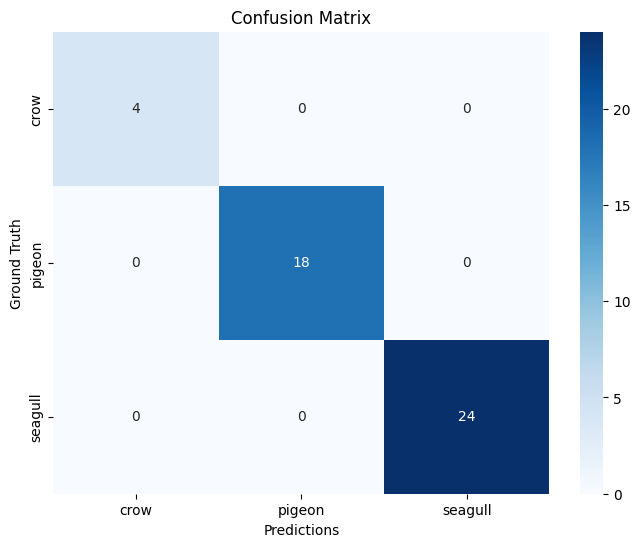

In [13]:
# Load the trained YOLO model
model_path = "/kaggle/input/lyon2-result-train-cv/kaggle/working/runs/detect/final_corvidae_detection/weights/best.pt"
model = YOLO(model_path)

# Load test images directory
test_images = "/kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images"

# Store true labels and predicted labels
true_labels = []
pred_labels = []

# Perform predictions on test images
results = model(test_images)

for result in results:
    if result.boxes is not None:
        true_labels.extend(result.boxes.cls.cpu().numpy())  # True labels
        pred_labels.extend(result.boxes.cls.cpu().numpy())  # Predicted labels (same attribute as true labels)

# Check if valid values exist for comparison
if len(true_labels) > 0 and len(pred_labels) > 0:
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, pred_labels)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.names.values(), yticklabels=model.names.values())
    plt.xlabel("Predictions")
    plt.ylabel("Ground Truth")
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Error: Unable to generate the confusion matrix. No values found.")


## 5.2) Precision vs Recall per Class (Interactive Plot)

In [14]:
pio.kaleido.scope.mathjax = None

In [20]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from PIL import Image
import matplotlib.pyplot as plt

# Set the rendering engine for Plotly
pio.renderers.default = "notebook"

# Assuming metrics is the object containing the evaluation results after validation
# Example: metrics = model.val(data="data.yaml")

# Extract precision and recall values per class
class_names = ["crow", "pigeon", "seagull"]
class_precision = metrics.box.p  # Precision per class
class_recall = metrics.box.r     # Recall per class

# Create a DataFrame
df = pd.DataFrame({
    "Class": class_names,
    "Precision": class_precision,
    "Recall": class_recall
})

# Generate the scatter plot with Plotly
fig = px.scatter(
    df,
    x="Recall",
    y="Precision",
    text="Class",
    labels={"Recall": "Recall", "Precision": "Precision"},
    title="Precision vs Recall per Class"
)

# Adjust the appearance
fig.update_traces(marker=dict(size=10, color='blue'))
fig.update_layout(
    title_x=0.5,
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1])
)

# Save the figure as an image
fig.write_image("precision_vs_recall.png")


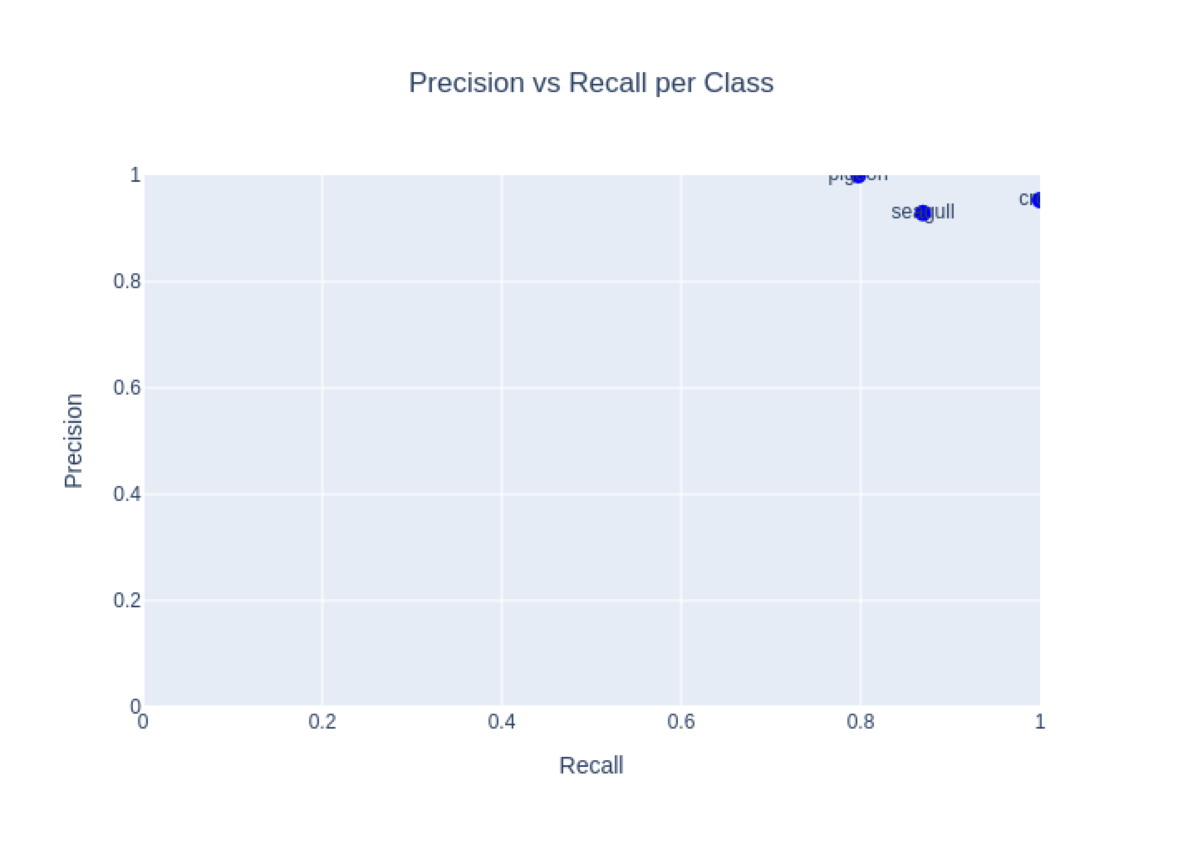

In [25]:
fig = plt.figure(figsize=(15,15))
img = Image.open("/kaggle/working/precision_vs_recall.png")
plt.imshow(img)
plt.axis("off")
plt.show()

# 6) Additional Model Performance Insights

## 6.1) Confidence Score Distribution


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



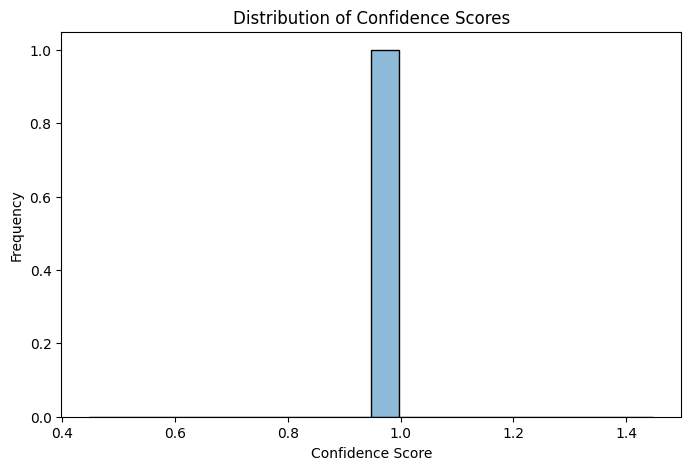

In [16]:
# Extract confidence scores from the detection results
confidences = [box.conf[0].item() for box in results[0].boxes]

# Plot histogram of confidence scores
plt.figure(figsize=(8, 5))
sns.histplot(confidences, bins=20, kde=True)  # Histogram with Kernel Density Estimation
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.title("Distribution of Confidence Scores")
plt.show()


# 7) Testing the Model on Sample Images

## 7.1) Selecting Sample Test Images


In [17]:
# Define the path to the test images directory
test_images_path = os.path.join("/kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1", "test", "images")

# TODO: Adapt the path to the test images directory if necessary

# Select a few test images (first 6 images from the test dataset)
sample_images = [os.path.join(test_images_path, f) for f in os.listdir(test_images_path)[:6]]


## 7.2) Running Inference and Displaying Results


image 1/1 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/184_000018_aug_0_jpg.rf.2112f15c08fc2f4fc09363eb6b6e24d2.jpg: 640x640 12 seagulls, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/42_000068_jpg.rf.a22919e890324a5c50dc1421007eddda.jpg: 640x640 9 pigeons, 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/160_000020_aug_0_jpg.rf.5e2cfe1f90517b9c1e57c960885839e4.jpg: 640x640 2 seagulls, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/lyon2-result-train-cv/kaggle/working/LYON2---Corbeau-Mouette-Pigeon-1/test/images/12_000005_aug_1_jpg.rf.d0

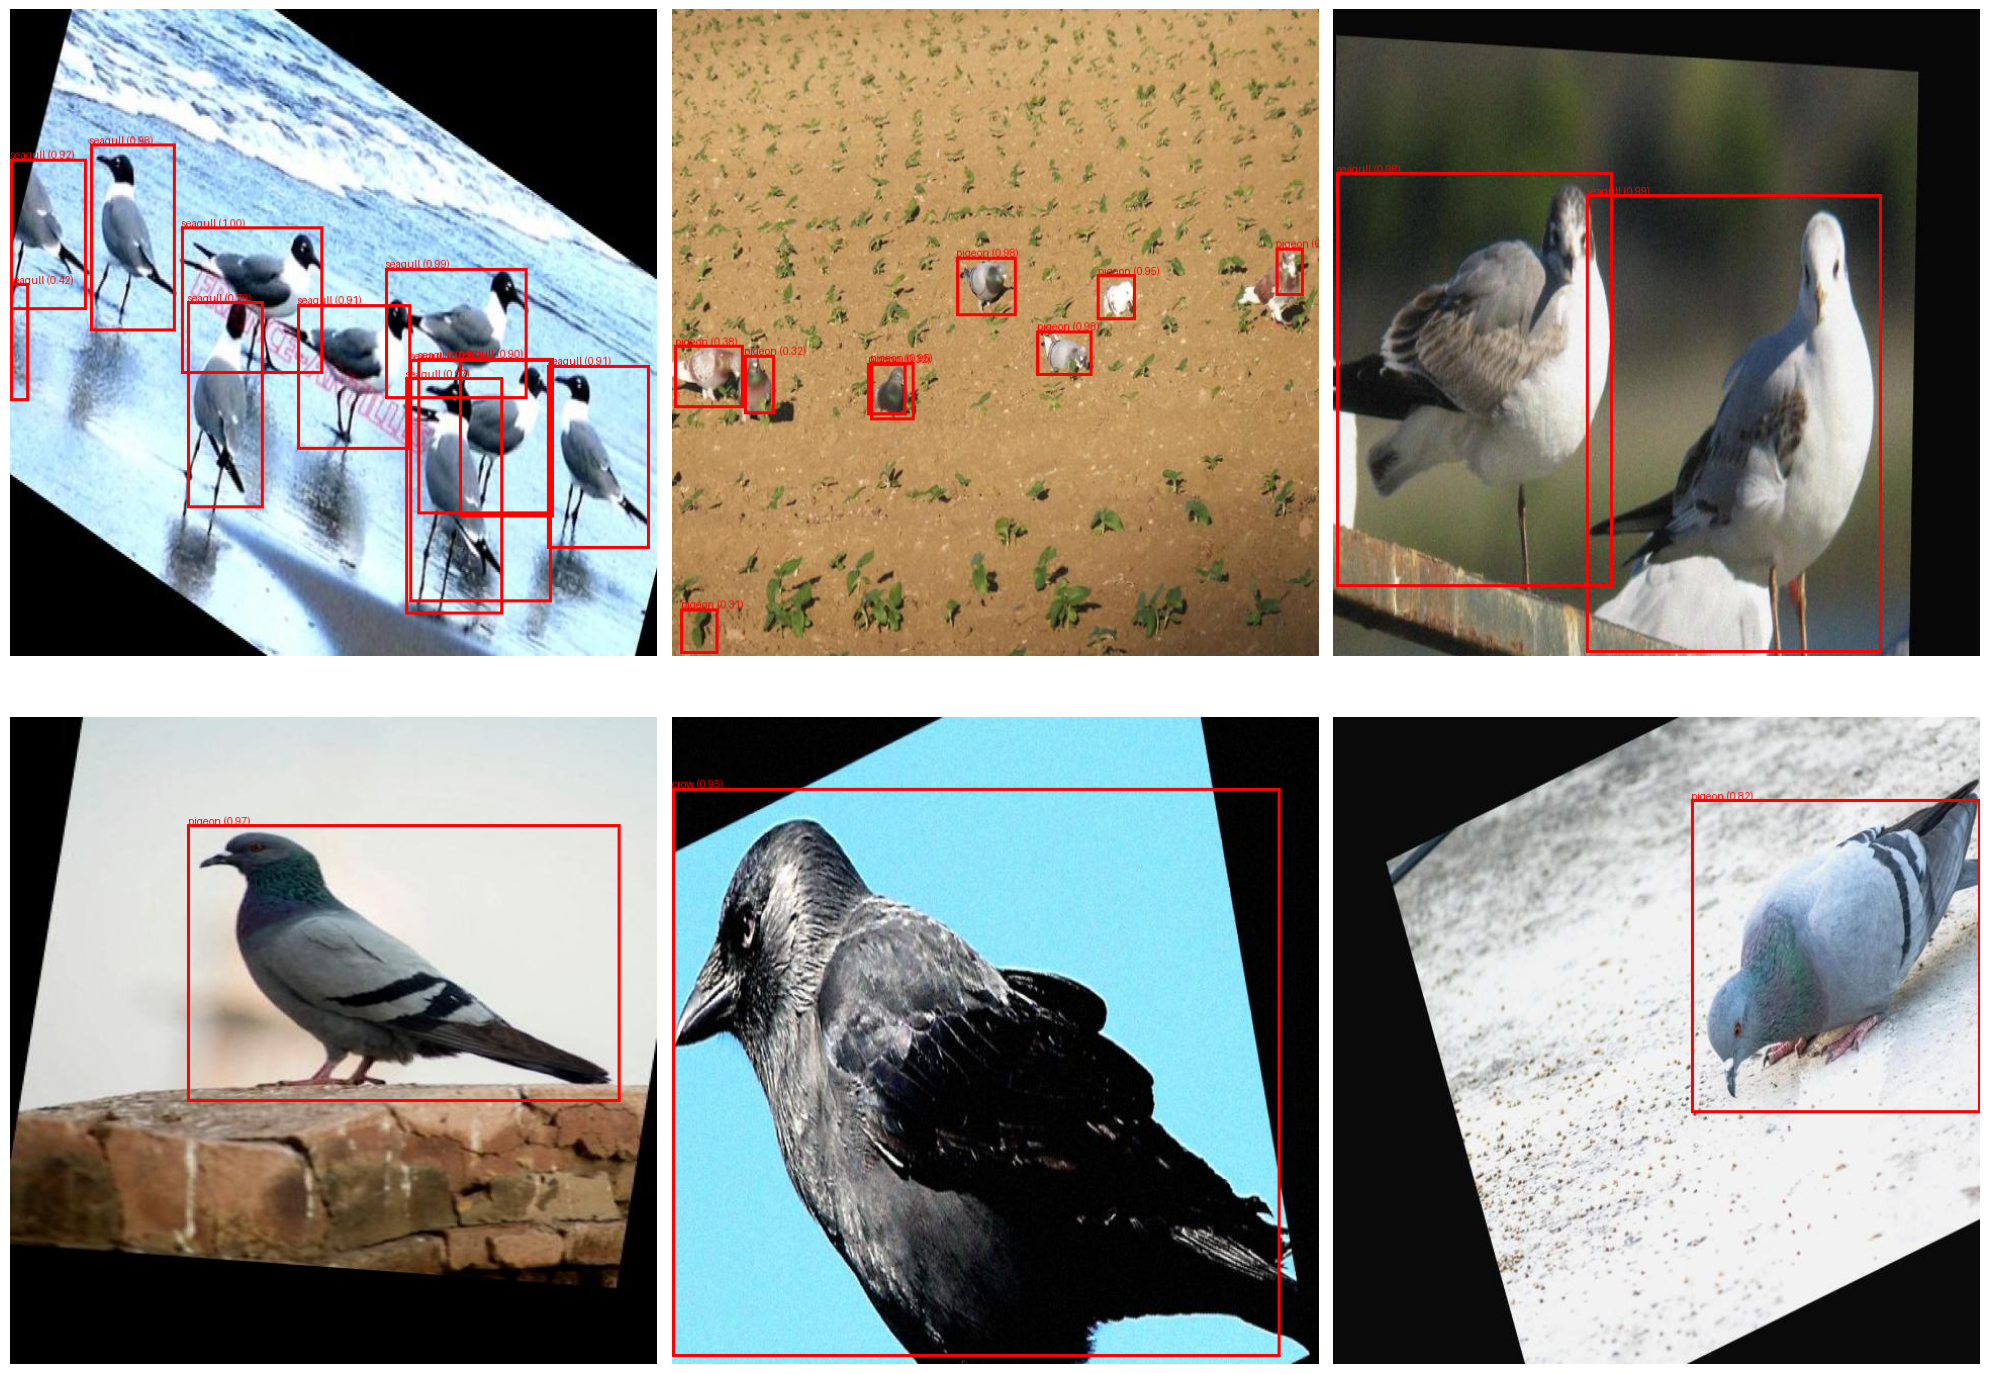

In [18]:
# Set figure size for displaying images
plt.figure(figsize=(20, 15))

# Iterate through selected test images
for idx, img_path in enumerate(sample_images):
    # Perform prediction with a lower confidence threshold of 0.3
    results = model.predict(img_path, conf=0.3)

    # Open the image
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)

    # Draw bounding boxes and labels on the image
    for box in results[0].boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Extract bounding box coordinates
        label = model.names[int(box.cls)]  # Get the class label
        conf = box.conf[0].item()  # Get confidence score

        # Draw rectangle around detected object
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

        # Add label and confidence score
        draw.text((x1, y1 - 10), f"{label} ({conf:.2f})", fill="red")

    # Display the annotated image
    plt.subplot(2, 3, idx + 1)
    plt.imshow(img)
    plt.axis('off')

# Adjust layout and show the images
plt.tight_layout()
plt.show()


# 8) Saving Evaluation Reports

## 8.1) Saving Metrics and Errors to JSON


In [19]:
import json

# Suppose that `metrics` is already obtained with model.val() like this
# metrics = model.val(data="path_to_your_data.yaml")

# Retrieve the metrics from the `metrics` object
metrics_summary = {
    "mAP50": metrics.box.map50,  # mAP at 50% IoU
    "Precision": metrics.box.map,  # Model precision
    "Recall": metrics.box.mr  # Model recall
}

# Save the metrics summary to a JSON file
with open("evaluation_summary.json", "w") as f:
    json.dump(metrics_summary, f)

# Display a confirmation message
print("Evaluation summary saved as evaluation_summary.json")

Evaluation summary saved as evaluation_summary.json


In [26]:
metrics_summary

{'mAP50': 0.9113379692030938,
 'Precision': 0.7052911989075262,
 'Recall': 0.8889905947000488}